Accuracy: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
Macro-Average ROC AUC: 1.00


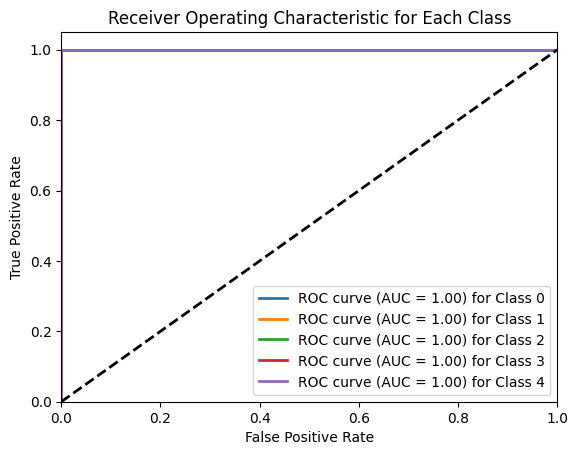

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data and labels
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

# Extract features (data) and target labels (classes)
X = data.values[:, 1:]  # Assuming the first column is an identifier, not a feature
Y = labels.values[:, 1]  # Assuming the first column is an identifier, not a label

# Encode class labels as numbers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier
k = 5  # You can adjust the value of k as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

# Calculate per-class ROC and AUC
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    Y_true_class = (Y_test == i)
    Y_pred_class = (Y_pred == i)
    fpr[i], tpr[i], _ = roc_curve(Y_true_class, Y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_roc_auc = auc(all_fpr, mean_tpr)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Macro-Average ROC AUC: {macro_roc_auc:.2f}")

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='lower right')
plt.show()


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

# Extract features (data) and target labels (classes)
X = data.values[:, 1:]  # Assuming the first column is an identifier, not a feature
Y = labels.values[:, 1]  # Assuming the first column is an identifier, not a label

# Encode class labels as numbers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Initialize and train the KNN classifier
k = 3  # You can adjust the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
ca = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# In a KNN classifier, AUC is not directly available, but you can use decision_function or predict_proba for binary classification
if len(label_encoder.classes_) == 2:
    y_scores = knn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_scores)
else:
    auc = None

# Print the metrics
print("Classification Accuracy (CA):", ca)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)


Classification Accuracy (CA): 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
AUC: None
